# Edited by Ashen; 微信公众号:爱研思谈; Github:AshenOneme

In [70]:
import openseespy.opensees as ops
import opsvis as opsv
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator,FormatStrFormatter
from pylab import *
import os

## 二维坐标系下
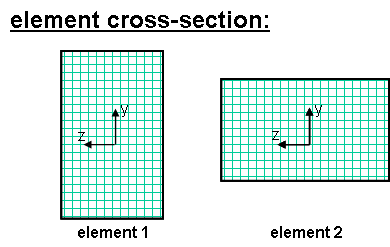
#### 截面局部坐标系如下：
Y   
^   
|                 
|   
----------> Z
#### 结构整体坐标系如下：    
</p>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
    Y      </p>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
    ^      </p>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
    |      </p>        
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;     
    |      </p>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
    ----------> X   </p>
    &nbsp;&nbsp;&nbsp;&nbsp;
   /   </p>
   &nbsp;&nbsp;&nbsp;
  /   </p>
  &nbsp;&nbsp;
 /   </p>
 
Z </p>
</div>   

#### 二维坐标系下的截面坐标：
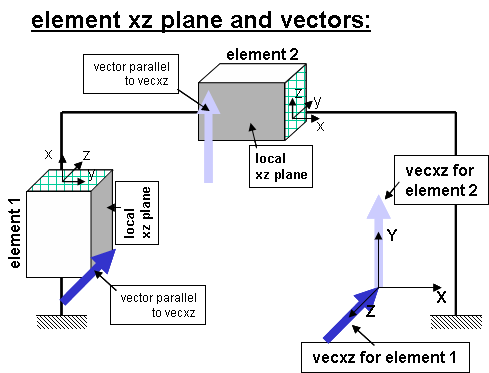



### 材料信息

In [71]:
ops.wipe()
ops.model('basic', '-ndm', 2, '-ndf', 3)
IDSteel = 1
Fy_Steel = 400
E0_Steel = 206000
bs_Steel = 0.005
R0 = 12.5
cR1 = 0.925
cR2 = 0.15
ops.uniaxialMaterial('Steel02', IDSteel, Fy_Steel, E0_Steel, bs_Steel,R0,cR1,cR2)

IDCoverC=2
fpc_cover=-40
epsc0_cover=-0.002
fpcu_cover=-8
epsU_cover=-0.004
ops.uniaxialMaterial('Concrete01', IDCoverC, fpc_cover, epsc0_cover, fpcu_cover, epsU_cover)

IDCoreC=3
fpc_core=-40
epsc0_core=-0.0024
fpcu_core=-18
epsU_core=-0.006
ops.uniaxialMaterial('Concrete01', IDCoreC, fpc_core, epsc0_core, fpcu_core, epsU_core)

### 截面信息(Element1)

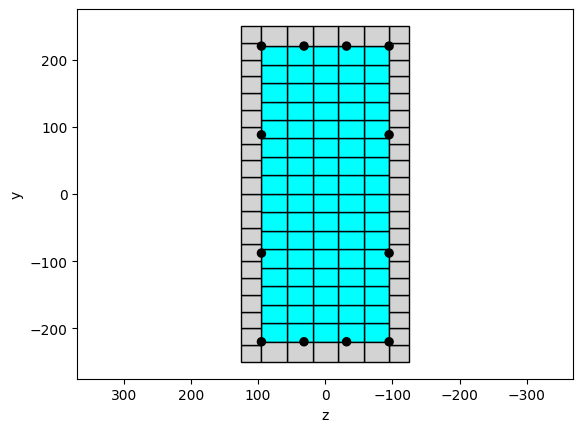

In [72]:
Bbeam = 250
Hbeam = 500
c=30
y1beam = Hbeam/2.0
z1beam = Bbeam/2.0
y2beam = (Hbeam-2*c)/5.0
nFibZ=1
nFibZ_Core = 5
nFib=20
nFibCover, nFibY_Core = 1, 16
As_bar = 3.14*6*6
fiber_beam_section1=1
ops.section('Fiber', fiber_beam_section1)
ops.patch('rect', IDCoreC, nFibY_Core, nFibZ_Core, c-y1beam, c-z1beam, y1beam-c, z1beam-c)
ops.patch('rect', IDCoverC, nFib, nFibZ, -y1beam, -z1beam, y1beam, c-z1beam)
ops.patch('rect', IDCoverC, nFib, nFibZ, -y1beam, z1beam-c, y1beam, z1beam)
ops.patch('rect', IDCoverC, nFibCover, nFibZ_Core, -y1beam, c-z1beam, c-y1beam, z1beam-c)
ops.patch('rect', IDCoverC, nFibCover, nFibZ_Core, y1beam-c, c-z1beam, y1beam, z1beam-c)
ops.layer('straight', IDSteel, 2, As_bar, y1beam - c, z1beam - c, y1beam - c, c - z1beam)
ops.layer('straight', IDSteel, 2, As_bar, y2beam, z1beam - c, y2beam, c - z1beam)
ops.layer('straight', IDSteel, 2, As_bar, -y2beam, z1beam - c, -y2beam, c - z1beam)
ops.layer('straight', IDSteel, 2, As_bar, c - y1beam, z1beam - c, c - y1beam, c - z1beam)
fiber_beam_section_D=[['section', 'Fiber', 2],
                     ['patch', 'rect', IDCoreC, nFibY_Core, nFibZ_Core, c-y1beam, c-z1beam, y1beam-c, z1beam-c],
                     ['patch', 'rect', IDCoverC, nFib, nFibZ, -y1beam, -z1beam, y1beam, c-z1beam],
                     ['patch', 'rect', IDCoverC, nFib, nFibZ, -y1beam, z1beam-c, y1beam, z1beam],
                     ['patch', 'rect', IDCoverC, nFibCover, nFibZ_Core, -y1beam, c-z1beam, c-y1beam, z1beam-c],
                     ['patch', 'rect', IDCoverC, nFibCover, nFibZ_Core, y1beam-c, c-z1beam, y1beam, z1beam-c],
                     ['layer', 'straight', IDSteel, 4, As_bar, y1beam - c, z1beam - c, y1beam - c, c - z1beam],
                     ['layer', 'straight', IDSteel, 2, As_bar, y2beam, z1beam - c, y2beam, c - z1beam],
                     ['layer', 'straight', IDSteel, 2, As_bar, -y2beam, z1beam - c, -y2beam, c - z1beam],
                     ['layer', 'straight', IDSteel, 4, As_bar, c - y1beam, z1beam - c, c - y1beam, c - z1beam]]

matcolor = ['red', 'lightgrey', 'cyan', 'w', 'w', 'w']
opsv.plot_fiber_section(fiber_beam_section_D, matcolor=matcolor)
plt.axis('equal')
plt.show()

### 截面信息(Element2)

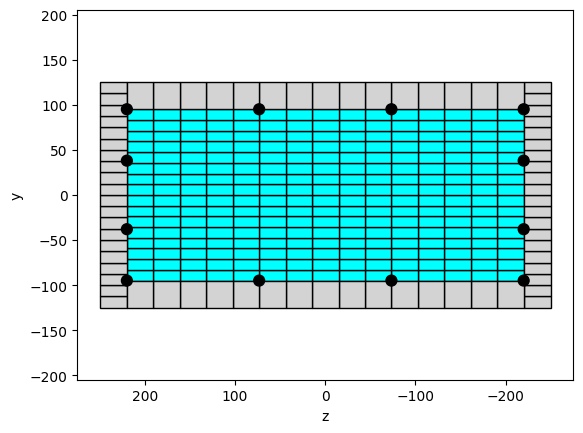

In [73]:
Bbeam = 250
Hbeam = 500
c=30
y1beam = Hbeam/2.0
z1beam = Bbeam/2.0
z2beam = (Bbeam-2*c)/5.0
nFibZ=1
nFibZ_Core = 15
nFib=20
nFibCover, nFibY_Core = 1, 16
As_bar = 3.14*6*6
fiber_beam_section2=2
ops.section('Fiber', fiber_beam_section2)
ops.patch('rect', IDCoreC, nFibY_Core, nFibZ_Core, c-z1beam, c-y1beam, z1beam-c, y1beam-c)
ops.patch('rect', IDCoverC, nFib, nFibZ, -z1beam, -y1beam, z1beam, c-y1beam)
ops.patch('rect', IDCoverC, nFib, nFibZ, -z1beam, y1beam-c, z1beam, y1beam)
ops.patch('rect', IDCoverC, nFibCover, nFibZ_Core, -z1beam, c-y1beam, c-z1beam, y1beam-c)
ops.patch('rect', IDCoverC, nFibCover, nFibZ_Core, z1beam-c, c-y1beam, z1beam, y1beam-c)
ops.layer('straight', IDSteel, 4, As_bar, z1beam - c, y1beam - c, z1beam - c, c - y1beam)
ops.layer('straight', IDSteel, 2, As_bar, z2beam, y1beam - c, z2beam, c - y1beam)
ops.layer('straight', IDSteel, 2, As_bar, -z2beam, y1beam - c, -z2beam, c - y1beam)
ops.layer('straight', IDSteel, 4, As_bar, c - z1beam, y1beam - c, c - z1beam, c - y1beam)

fiber_beam_section_D=[['section', 'Fiber', 2],
                     ['patch', 'rect', IDCoreC, nFibY_Core, nFibZ_Core, c-z1beam, c-y1beam, z1beam-c, y1beam-c],
                     ['patch', 'rect', IDCoverC, nFib, nFibZ, -z1beam, -y1beam, z1beam, c-y1beam],
                     ['patch', 'rect', IDCoverC, nFib, nFibZ, -z1beam, y1beam-c, z1beam, y1beam],
                     ['patch', 'rect', IDCoverC, nFibCover, nFibZ_Core, -z1beam, c-y1beam, c-z1beam, y1beam-c],
                     ['patch', 'rect', IDCoverC, nFibCover, nFibZ_Core, z1beam-c, c-y1beam, z1beam, y1beam-c],
                     ['layer', 'straight', IDSteel, 4, As_bar, z1beam - c, y1beam - c, z1beam - c, c - y1beam],
                     ['layer', 'straight', IDSteel, 2, As_bar, z2beam, y1beam - c, z2beam, c - y1beam],
                     ['layer', 'straight', IDSteel, 2, As_bar, -z2beam, y1beam - c, -z2beam, c - y1beam],
                     ['layer', 'straight', IDSteel, 4, As_bar, c - z1beam, y1beam - c, c - z1beam, c - y1beam]]

matcolor = ['red', 'lightgrey', 'cyan', 'w', 'w', 'w']
opsv.plot_fiber_section(fiber_beam_section_D, matcolor=matcolor)
plt.axis('equal')
plt.show()

#### 坐标转换

In [74]:
coordTransf = "PDelta"  # Linear, PDelta, Corotational
IDColumnTransf2D = 1
ops.geomTransf(coordTransf, IDColumnTransf2D)
IDBeamTransf2D = 2
ops.geomTransf(coordTransf, IDBeamTransf2D)
IDFCSIntegration2D = 1
ops.beamIntegration('Trapezoidal', IDFCSIntegration2D, fiber_beam_section1,4)
IDFBSIntegration2D = 2
ops.beamIntegration('Trapezoidal', IDFBSIntegration2D, fiber_beam_section2,4)

## 三维坐标系下
#### 截面局部坐标的Z轴对准整体坐标哪个轴，输入相应坐标
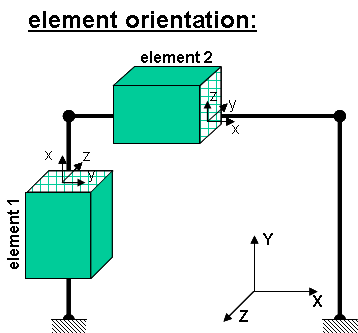

In [75]:
coordTransf = "PDelta"  # Linear, PDelta, Corotational
IDColumnTransf3D = 3
ops.geomTransf(coordTransf, IDColumnTransf3D,0,0,-1)
IDBeamTransf3D = 4
ops.geomTransf(coordTransf, IDBeamTransf3D,0,1,0)
IDFCSIntegration3D = 3
ops.beamIntegration('Trapezoidal', IDFCSIntegration3D, fiber_beam_section1,4)
IDFBSIntegration3D = 4
ops.beamIntegration('Trapezoidal', IDFBSIntegration3D, fiber_beam_section2,4)